In [0]:
from pyspark.sql.types import *
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf, regexp_extract, explode, lower, length, trim, when, regexp_replace, collect_list, struct, concat_ws
from pyspark.sql import functions as F

import sparknlp
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors
from pyspark.ml.functions import array_to_vector

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [0]:
spark = sparknlp.start()
clusters_pd = pd.read_csv('data/clustering_4options.csv')
requirements_clusters = spark.createDataFrame(clusters_pd)

In [0]:
# UDF to convert string to array of floats
def string_to_array(embedding_str):
    return [float(x) for x in embedding_str.strip("[]").split(",")]

string_to_array_udf = udf(string_to_array, ArrayType(FloatType()))
requirements_clusters_embed = requirements_clusters.withColumn(
    "Embeddings", string_to_array_udf(col("Embeddings_Model1"))).drop("Embeddings_Model1", "Embeddings_Model2")

requirements_df = requirements_clusters_embed.withColumn("Embeddings_Vector", array_to_vector(col("Embeddings")))

# Ensure embeddings are in the correct vector format
vector_assembler1 = VectorAssembler(inputCols=["Embeddings_Vector"], outputCol="features")

requirements_df = vector_assembler1.transform(requirements_df)

In [0]:
requirements_df.limit(10).display()

Title Company Full Job Description Search Word Description Description_English Requirements_Text Cluster_spark_KMeans_1 Cluster_spark_KMeans_2 Cluster_DBSCAN_Model1 Cluster_DBSCAN_Model2 Embeddings Embeddings_Vector features Data Analytics Apple Summary Posted: Nov 7, 2024 Role Number: 200577967 We're looking for an exceptional data analyst with a strong background in distributed data processing and a demonstrated ability to turn data into actionable insights. As a data analyst for our Storage Data Analytics team at Apple, you'll play a crucial role in developing the fastest and most efficient SSDs for our products, including the iPhone, iPad, Apple Watch, and new Apple Silicon Macs. If you're passionate about continuously improving the ways we use data to make Apple's products amazing, we want to hear from you! Description On the Storage Data Analytics team, we are responsible for performing ad hoc data analysis, development and maintenance of distributed data pipelines, as well as creation and support of analysis tools. Our team focuses on Apple’s storage solutions. It is small and nimble, able to quickly explore ideas and present them to the storage teams and to leadership. Minimum Qualifications +3 years of experience Ability to lead data investigations and analysis projects with ambiguous requirements Advanced statistic and modeling knowledge Experience visualizing and presenting analyses in tools like Jupyter and Tableau Experience programming in Python in a professional setting Familiarity with distributed computation, storage, and workflow management (e.g. Splunk, Spark, Kubernetes, Kafka, Hadoop, MapReduce, AirFlow etc.) Experience with relational databases and SQL Highly organized, creative, motivated, and passionate about achieving results Curious and have excellent analytical and problem solving skills Excellent written, verbal, and data communication skills Bachelor's or Master's degree in computer science. Preferred Qualifications Familiarity with distributed computation, storage, and workflow management (e.g. Splunk, Spark, Kubernetes, Kafka, Hadoop, MapReduce, AirFlow etc.) Opened URL: https://il.indeed.com/rc/clk?jk=0433bc7e45e694a3&bb=r6UIYw2mow7Pn8IzQwq2_7gXyX4L0a9oUPOLDIseoxAN8l0MRFFfCqpU6vSJRCmVlzxZCXcY6V-lzbB66NkEzDukGjQJgUJrBPff0HR1apFcJos6F0MbonwvLMjHhNz9&xkcb=SoDD67M33wH7H8WWaB0JbzkdCdPP&fccid=8e007f7a76f9cee5&vjs=3 data Summary Posted: Nov 7, 2024 Role Number: 200577967 We're looking for an exceptional data analyst with a strong background in distributed data processing and a demonstrated ability to turn data into actionable insights. As a data analyst for our Storage Data Analytics team at Apple, you'll play a crucial role in developing the fastest and most efficient SSDs for our products, including the iPhone, iPad, Apple Watch, and new Apple Silicon Macs. If you're passionate about continuously improving the ways we use data to make Apple's products amazing, we want to hear from you! Description On the Storage Data Analytics team, we are responsible for performing ad hoc data analysis, development and maintenance of distributed data pipelines, as well as creation and support of analysis tools. Our team focuses on Apple’s storage solutions. It is small and nimble, able to quickly explore ideas and present them to the storage teams and to leadership. Minimum Qualifications +3 years of experience Ability to lead data investigations and analysis projects with ambiguous requirements Advanced statistic and modeling knowledge Experience visualizing and presenting analyses in tools like Jupyter and Tableau Experience programming in Python in a professional setting Familiarity with distributed computation, storage, and workflow management (e.g. Splunk, Spark, Kubernetes, Kafka, Hadoop, MapReduce, AirFlow etc.) Experience with relational databases and SQL Highly organized, creative, motivated, and passionate about achieving results Curious and have excellent analytical and problem solving skills Excellent wr

# Cluster Titles

In [0]:
pos_clusters = requirements_df.groupby("Cluster_DBSCAN_Model1").agg(F.collect_list("Title").alias("Job_Titles"), F.count("*").alias("Num_Rows")).withColumnRenamed("Cluster_DBSCAN_Model1", "Cluster")
pos_clusters.display()

Cluster,Job_Titles,Num_Rows
0,"List(Data Analytics, Junior Data Analyst, Data Scientist, Customer Data Engineer, Data scientist, Data Scientist, Data Analytics, Junior Data Engineer, Data Scientist, Data scientist, Data Engineer, Junior Data Analyst, Data Analytics, Customer Data Engineer, data scientist!, Data ANALYSTS, Junior Data Engineer, Data Reliability Engineer, Junior ML Engineer, Data Analyst, Data Analytics, Data Annotator, Junior Data Engineer, Data Reliability Engineer, Junior ML Engineer, Data Engineer, Data Scientist, Data Scientist, Data scientist, Data scientist, Data Scientist, Data Scientist, Expert Data Scientist, Expert Data Scientist, Data Scientist, Real World Data Scientist, Data Scientist, Computer Vision Data Scientist, Data Scientist, Data Scientist, data scientist!, Data scientist, Data scientist, Data Scientist, Data Scientist, Data Engineer, Real World Data Scientist, Data Scientist, Data Scientist, Data Scientist, Computer Vision Data Scientist, Data Scientist, Real World Data Scientist, Data Scientist, data scientist!, Data scientist, Data Scientist, Data Engineer, Real World Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Real World Data Scientist, Data Scientist, Real World Data Scientist, Real World Data Scientist, Data Scientist, data scientist!, Data Scientist, Data scientist, Data Scientist, Real World Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist (GenAI), Data Scientist, Real World Data Scientist, Real World Data Scientist, Real World Data Scientist, Data Scientist, Data scientist, Data scientist, Data Scientist, Real World Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist (GenAI), Biostatistician - AI Trainer, Part-Time Contract Senior Data Engineer, Data Engineer I (R-17233), Junior Data Analyst, Data Analyst I, Experimentation, Data Scientist, Data Analyst, Data Engineer II (Remote), Data Engineer, Junior Data Analyst, Full-time Parts manager and farm data processor., Data Engineer I (R-17233), Data Engineer, Data Engineer/ SQL, Data Analyst, Data Engineer, Data Engineer, :, Data Engineer I (R-17233), Data Analytics Engineer, Data Engineer, Data Scientist, Junior Data Engineer, Sr. Data Engineer, Royalty Data Analyst - HarbourView, Data Engineer II (Remote), :, Data Engineer, Data Engineer I (R-17233), Data Analyst I, Data Analyst, BI Data & Visualization Engineer, Data Analyst, Data Scientist, :, :, Data Engineer II (Remote), Associate Software Developer, Senior Developer, Front End Developer, Entry Level Java Developer, Manager, Software Engineering, Full Stack Java Software Engineer - Remote, Full Stack Java Software Engineer - Remote, Entry Level Java Developer, Front End and Analytics Developer to Modernize Cybersecurity Systems, Web Developer- AI Trainer, :, Software Engineer, Backend, Entry Level Java Developer, Software Developer, Web Developer)",294
7,"List(data scientist!, Customer Data Engineer, Data Engineer, Data ANALYSTS, data scientist!, Real World Data Scientist, Real World Data Scientist, Computer Vision Data Scientist, Data scientist, data scientist!, Real World Data Scientist)",20
6,"List(Data Scientist, data scientist!, Data Annotator, data scientist!, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Engineer, Data Scientist)",20
9,"List(Data Center Logistic Technician - Modi'in area, Data scientist, Data Analyst)",4
5,"List(Junior Data Engineer, Data Scientist, Data Scientist, Customer Data Engineer)",8
1,"List(Junior Backend Big Data Developer, Junior Backend Big Data Developer, Junior Backend Big Data Developer, Junior Backend Big Data Developer)",8
3,"List(Marketing Data Analyst, Data Scientist, Junior Data Analyst, Junior Data Engineer)",7
8,"List(Big Data developer - Python, Data Annotator, Junior Data Engineer, Junior Data Analyst)",7
2,"List(Data Annotator, Marketing D

In [0]:
# Assign cluster names
from collections import Counter

STOP_WORDS = {"the", "is", "in", "and", "to", "a", "of", "on", "for", "with", "at", "by", "an", "be", "this", "that"}

def assign_cluster_title(cluster_id, job_titles):
    if cluster_id == -1:
        return "Other"  # Explicitly label outliers

    all_words = [word.lower() for t in job_titles for word in t.split()]
    filtered_words = [word for word in all_words if word not in STOP_WORDS and word.isalnum()]
    word_counts = Counter(filtered_words)
    most_common = word_counts.most_common(2)
    
    if len(most_common) == 0:
        return "Unknown"
    
    if len(most_common) == 1 or (most_common[0][1] > 3 * most_common[1][1] and most_common[1][1] > 1):
        # Use only the most common word if it is more than twice as frequent
        return most_common[0][0]
    else:
        # Otherwise, combine the two most common words
        return f"{most_common[0][0]} {most_common[1][0]}"

assign_cluster_title_udf = F.udf(assign_cluster_title)
clusters_with_titles = pos_clusters.withColumn("Cluster_Title", assign_cluster_title_udf(col("Cluster"), col("Job_Titles")))

clusters_with_titles.display()

Cluster,Job_Titles,Num_Rows,Cluster_Title
0,"List(Data Analytics, Junior Data Analyst, Data Scientist, Customer Data Engineer, Data scientist, Data Scientist, Data Analytics, Junior Data Engineer, Data Scientist, Data scientist, Data Engineer, Junior Data Analyst, Data Analytics, Customer Data Engineer, data scientist!, Data ANALYSTS, Junior Data Engineer, Data Reliability Engineer, Junior ML Engineer, Data Analyst, Data Analytics, Data Annotator, Junior Data Engineer, Data Reliability Engineer, Junior ML Engineer, Data Engineer, Data Scientist, Data Scientist, Data scientist, Data scientist, Data Scientist, Data Scientist, Expert Data Scientist, Expert Data Scientist, Data Scientist, Real World Data Scientist, Data Scientist, Computer Vision Data Scientist, Data Scientist, Data Scientist, data scientist!, Data scientist, Data scientist, Data Scientist, Data Scientist, Data Engineer, Real World Data Scientist, Data Scientist, Data Scientist, Data Scientist, Computer Vision Data Scientist, Data Scientist, Real World Data Scientist, Data Scientist, data scientist!, Data scientist, Data Scientist, Data Engineer, Real World Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Real World Data Scientist, Data Scientist, Real World Data Scientist, Real World Data Scientist, Data Scientist, data scientist!, Data Scientist, Data scientist, Data Scientist, Real World Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist (GenAI), Data Scientist, Real World Data Scientist, Real World Data Scientist, Real World Data Scientist, Data Scientist, Data scientist, Data scientist, Data Scientist, Real World Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist (GenAI), Biostatistician - AI Trainer, Part-Time Contract Senior Data Engineer, Data Engineer I (R-17233), Junior Data Analyst, Data Analyst I, Experimentation, Data Scientist, Data Analyst, Data Engineer II (Remote), Data Engineer, Junior Data Analyst, Full-time Parts manager and farm data processor., Data Engineer I (R-17233), Data Engineer, Data Engineer/ SQL, Data Analyst, Data Engineer, Data Engineer, :, Data Engineer I (R-17233), Data Analytics Engineer, Data Engineer, Data Scientist, Junior Data Engineer, Sr. Data Engineer, Royalty Data Analyst - HarbourView, Data Engineer II (Remote), :, Data Engineer, Data Engineer I (R-17233), Data Analyst I, Data Analyst, BI Data & Visualization Engineer, Data Analyst, Data Scientist, :, :, Data Engineer II (Remote), Associate Software Developer, Senior Developer, Front End Developer, Entry Level Java Developer, Manager, Software Engineering, Full Stack Java Software Engineer - Remote, Full Stack Java Software Engineer - Remote, Entry Level Java Developer, Front End and Analytics Developer to Modernize Cybersecurity Systems, Web Developer- AI Trainer, :, Software Engineer, Backend, Entry Level Java Developer, Software Developer, Web Developer)",294,data scientist
7,"List(data scientist!, Customer Data Engineer, Data Engineer, Data ANALYSTS, data scientist!, Real World Data Scientist, Real World Data Scientist, Computer Vision Data Scientist, Data scientist, data scientist!, Real World Data Scientist)",20,data scientist
6,"List(Data Scientist, data scientist!, Data Annotator, data scientist!, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Engineer, Data Scientist)",20,data scientist
9,"List(Data Center Logistic Technician - Modi'in area, Data scientist, Data Analyst)",4,data center
5,"List(Junior Data Engineer, Data Scientist, Data Scientist, Customer Data Engineer)",8,data engineer
1,"List(Junior Backend Big Data Developer, Junior Backend Big Data Developer, Junior Backend Big Data Developer, Junior Backend Big Data Developer)",8,junior backend
3,"List(Marketing Data Analyst, Data Scientist, Junior Data Analyst, Junior Data Engineer)",7,data analyst
8,"List(Big Data deve

In [0]:
final_clusters = clusters_with_titles.groupBy("Cluster_Title").agg(
    F.sum("Num_Rows").alias("Num_Rows"),
    F.flatten(F.collect_list("Job_Titles")).alias("Job_Titles"),  # Combine all job title lists into one
    F.collect_list("Cluster").alias("Clusters")  # Collect all cluster numbers in the group
)

final_clusters.display()

Cluster_Title,Num_Rows,Job_Titles,Clusters
data scientist,362,"List(Data Analytics, Junior Data Analyst, Data Scientist, Customer Data Engineer, Data scientist, Data Scientist, Data Analytics, Junior Data Engineer, Data Scientist, Data scientist, Data Engineer, Junior Data Analyst, Data Analytics, Customer Data Engineer, data scientist!, Data ANALYSTS, Junior Data Engineer, Data Reliability Engineer, Junior ML Engineer, Data Analyst, Data Analytics, Data Annotator, Junior Data Engineer, Data Reliability Engineer, Junior ML Engineer, Data Engineer, Data Scientist, Data Scientist, Data scientist, Data scientist, Data Scientist, Data Scientist, Expert Data Scientist, Expert Data Scientist, Data Scientist, Real World Data Scientist, Data Scientist, Computer Vision Data Scientist, Data Scientist, Data Scientist, data scientist!, Data scientist, Data scientist, Data Scientist, Data Scientist, Data Engineer, Real World Data Scientist, Data Scientist, Data Scientist, Data Scientist, Computer Vision Data Scientist, Data Scientist, Real World Data Scientist, Data Scientist, data scientist!, Data scientist, Data Scientist, Data Engineer, Real World Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Real World Data Scientist, Data Scientist, Real World Data Scientist, Real World Data Scientist, Data Scientist, data scientist!, Data Scientist, Data scientist, Data Scientist, Real World Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist (GenAI), Data Scientist, Real World Data Scientist, Real World Data Scientist, Real World Data Scientist, Data Scientist, Data scientist, Data scientist, Data Scientist, Real World Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Scientist (GenAI), Biostatistician - AI Trainer, Part-Time Contract Senior Data Engineer, Data Engineer I (R-17233), Junior Data Analyst, Data Analyst I, Experimentation, Data Scientist, Data Analyst, Data Engineer II (Remote), Data Engineer, Junior Data Analyst, Full-time Parts manager and farm data processor., Data Engineer I (R-17233), Data Engineer, Data Engineer/ SQL, Data Analyst, Data Engineer, Data Engineer, :, Data Engineer I (R-17233), Data Analytics Engineer, Data Engineer, Data Scientist, Junior Data Engineer, Sr. Data Engineer, Royalty Data Analyst - HarbourView, Data Engineer II (Remote), :, Data Engineer, Data Engineer I (R-17233), Data Analyst I, Data Analyst, BI Data & Visualization Engineer, Data Analyst, Data Scientist, :, :, Data Engineer II (Remote), Associate Software Developer, Senior Developer, Front End Developer, Entry Level Java Developer, Manager, Software Engineering, Full Stack Java Software Engineer - Remote, Full Stack Java Software Engineer - Remote, Entry Level Java Developer, Front End and Analytics Developer to Modernize Cybersecurity Systems, Web Developer- AI Trainer, :, Software Engineer, Backend, Entry Level Java Developer, Software Developer, Web Developer, data scientist!, Customer Data Engineer, Data Engineer, Data ANALYSTS, data scientist!, Real World Data Scientist, Real World Data Scientist, Computer Vision Data Scientist, Data scientist, data scientist!, Real World Data Scientist, Data Scientist, data scientist!, Data Annotator, data scientist!, Data Scientist, Data Scientist, Data Scientist, Data Scientist, Data Engineer, Data Scientist, Data Engineer, Big Data developer - Python, Data Scientist, Data scientist, Data Scientist, Data Engineer, Data Scientist, Real World Data Scientist, Data Scientist, Data Scientist - AI Trainer, Language Data Reviewer for Scottish Gaelic (Freelance/Task-based), Senior Data Scientist & Data Scientists, Data Analyst Intern, Data Scientist - AI Trainer, Data Scientist)","List(0, 7, 6, 4, 10, 31, 33, 38)"
etl developer,4,"List(ETL Developer, Automation Controls Engineer, Denver Software Development Opportunities)",List(46)
manager sem,4,"List(SEM Manag

# Visualizing the embeddings

In [0]:
# Prepare the mapping of cluster numbers to cluster titles
cluster_mapping = final_clusters.select(
    F.explode("Clusters").alias("Cluster"),
    "Cluster_Title"
)

requirements_clusters_new = requirements_df.join(
    cluster_mapping,
    requirements_df["Cluster_DBSCAN_Model1"] == cluster_mapping["Cluster"],
    how="left"
).drop("Cluster")

# Display the resulting DataFrame
requirements_clusters_new.limit(10).display()

Title Company Full Job Description Search Word Description Description_English Requirements_Text Cluster_spark_KMeans_1 Cluster_spark_KMeans_2 Cluster_DBSCAN_Model1 Cluster_DBSCAN_Model2 Embeddings Embeddings_Vector features Cluster_Title Data Analytics Apple Summary Posted: Nov 7, 2024 Role Number: 200577967 We're looking for an exceptional data analyst with a strong background in distributed data processing and a demonstrated ability to turn data into actionable insights. As a data analyst for our Storage Data Analytics team at Apple, you'll play a crucial role in developing the fastest and most efficient SSDs for our products, including the iPhone, iPad, Apple Watch, and new Apple Silicon Macs. If you're passionate about continuously improving the ways we use data to make Apple's products amazing, we want to hear from you! Description On the Storage Data Analytics team, we are responsible for performing ad hoc data analysis, development and maintenance of distributed data pipelines, as well as creation and support of analysis tools. Our team focuses on Apple’s storage solutions. It is small and nimble, able to quickly explore ideas and present them to the storage teams and to leadership. Minimum Qualifications +3 years of experience Ability to lead data investigations and analysis projects with ambiguous requirements Advanced statistic and modeling knowledge Experience visualizing and presenting analyses in tools like Jupyter and Tableau Experience programming in Python in a professional setting Familiarity with distributed computation, storage, and workflow management (e.g. Splunk, Spark, Kubernetes, Kafka, Hadoop, MapReduce, AirFlow etc.) Experience with relational databases and SQL Highly organized, creative, motivated, and passionate about achieving results Curious and have excellent analytical and problem solving skills Excellent written, verbal, and data communication skills Bachelor's or Master's degree in computer science. Preferred Qualifications Familiarity with distributed computation, storage, and workflow management (e.g. Splunk, Spark, Kubernetes, Kafka, Hadoop, MapReduce, AirFlow etc.) Opened URL: https://il.indeed.com/rc/clk?jk=0433bc7e45e694a3&bb=r6UIYw2mow7Pn8IzQwq2_7gXyX4L0a9oUPOLDIseoxAN8l0MRFFfCqpU6vSJRCmVlzxZCXcY6V-lzbB66NkEzDukGjQJgUJrBPff0HR1apFcJos6F0MbonwvLMjHhNz9&xkcb=SoDD67M33wH7H8WWaB0JbzkdCdPP&fccid=8e007f7a76f9cee5&vjs=3 data Summary Posted: Nov 7, 2024 Role Number: 200577967 We're looking for an exceptional data analyst with a strong background in distributed data processing and a demonstrated ability to turn data into actionable insights. As a data analyst for our Storage Data Analytics team at Apple, you'll play a crucial role in developing the fastest and most efficient SSDs for our products, including the iPhone, iPad, Apple Watch, and new Apple Silicon Macs. If you're passionate about continuously improving the ways we use data to make Apple's products amazing, we want to hear from you! Description On the Storage Data Analytics team, we are responsible for performing ad hoc data analysis, development and maintenance of distributed data pipelines, as well as creation and support of analysis tools. Our team focuses on Apple’s storage solutions. It is small and nimble, able to quickly explore ideas and present them to the storage teams and to leadership. Minimum Qualifications +3 years of experience Ability to lead data investigations and analysis projects with ambiguous requirements Advanced statistic and modeling knowledge Experience visualizing and presenting analyses in tools like Jupyter and Tableau Experience programming in Python in a professional setting Familiarity with distributed computation, storage, and workflow management (e.g. Splunk, Spark, Kubernetes, Kafka, Hadoop, MapReduce, AirFlow etc.) Experience with relational databases and SQL Highly organized, creative, motivated, and passionate about achieving results Curious and have excellent analytical and problem solving skill

In [0]:
from pyspark.ml.feature import PCA

# Reduce to 2 dimensions for visualization
pca = PCA(k=2, inputCol="features", outputCol="pca_features")
pca_model = pca.fit(requirements_clusters_new)
requirements_spark_PCA = pca_model.transform(requirements_clusters_new)

# Define schema for the resulting DataFrame
schema = StructType([
    StructField("x", FloatType(), True),
    StructField("y", FloatType(), True),
    StructField("Cluster", StringType(), True)
])

# Extract PCA components for visualization
pca_rdd = requirements_spark_PCA.select("pca_features", "Cluster_Title").rdd.map(
    lambda row: (float(row.pca_features[0]), float(row.pca_features[1]), row.Cluster_Title)
)
pca_df = pca_rdd.toDF(schema)

pca_pd = pca_df.toPandas()

requirements_spark_PCA.limit(10).display()

Title Company Full Job Description Search Word Description Description_English Requirements_Text Cluster_spark_KMeans_1 Cluster_spark_KMeans_2 Cluster_DBSCAN_Model1 Cluster_DBSCAN_Model2 Embeddings Embeddings_Vector features Cluster_Title pca_features Data Analytics Apple Summary Posted: Nov 7, 2024 Role Number: 200577967 We're looking for an exceptional data analyst with a strong background in distributed data processing and a demonstrated ability to turn data into actionable insights. As a data analyst for our Storage Data Analytics team at Apple, you'll play a crucial role in developing the fastest and most efficient SSDs for our products, including the iPhone, iPad, Apple Watch, and new Apple Silicon Macs. If you're passionate about continuously improving the ways we use data to make Apple's products amazing, we want to hear from you! Description On the Storage Data Analytics team, we are responsible for performing ad hoc data analysis, development and maintenance of distributed data pipelines, as well as creation and support of analysis tools. Our team focuses on Apple’s storage solutions. It is small and nimble, able to quickly explore ideas and present them to the storage teams and to leadership. Minimum Qualifications +3 years of experience Ability to lead data investigations and analysis projects with ambiguous requirements Advanced statistic and modeling knowledge Experience visualizing and presenting analyses in tools like Jupyter and Tableau Experience programming in Python in a professional setting Familiarity with distributed computation, storage, and workflow management (e.g. Splunk, Spark, Kubernetes, Kafka, Hadoop, MapReduce, AirFlow etc.) Experience with relational databases and SQL Highly organized, creative, motivated, and passionate about achieving results Curious and have excellent analytical and problem solving skills Excellent written, verbal, and data communication skills Bachelor's or Master's degree in computer science. Preferred Qualifications Familiarity with distributed computation, storage, and workflow management (e.g. Splunk, Spark, Kubernetes, Kafka, Hadoop, MapReduce, AirFlow etc.) Opened URL: https://il.indeed.com/rc/clk?jk=0433bc7e45e694a3&bb=r6UIYw2mow7Pn8IzQwq2_7gXyX4L0a9oUPOLDIseoxAN8l0MRFFfCqpU6vSJRCmVlzxZCXcY6V-lzbB66NkEzDukGjQJgUJrBPff0HR1apFcJos6F0MbonwvLMjHhNz9&xkcb=SoDD67M33wH7H8WWaB0JbzkdCdPP&fccid=8e007f7a76f9cee5&vjs=3 data Summary Posted: Nov 7, 2024 Role Number: 200577967 We're looking for an exceptional data analyst with a strong background in distributed data processing and a demonstrated ability to turn data into actionable insights. As a data analyst for our Storage Data Analytics team at Apple, you'll play a crucial role in developing the fastest and most efficient SSDs for our products, including the iPhone, iPad, Apple Watch, and new Apple Silicon Macs. If you're passionate about continuously improving the ways we use data to make Apple's products amazing, we want to hear from you! Description On the Storage Data Analytics team, we are responsible for performing ad hoc data analysis, development and maintenance of distributed data pipelines, as well as creation and support of analysis tools. Our team focuses on Apple’s storage solutions. It is small and nimble, able to quickly explore ideas and present them to the storage teams and to leadership. Minimum Qualifications +3 years of experience Ability to lead data investigations and analysis projects with ambiguous requirements Advanced statistic and modeling knowledge Experience visualizing and presenting analyses in tools like Jupyter and Tableau Experience programming in Python in a professional setting Familiarity with distributed computation, storage, and workflow management (e.g. Splunk, Spark, Kubernetes, Kafka, Hadoop, MapReduce, AirFlow etc.) Experience with relational databases and SQL Highly organized, creative, motivated, and passionate about achieving results Curious and have excellent analytical and problem 

[0.1085200841748219,0.06158909445368487]


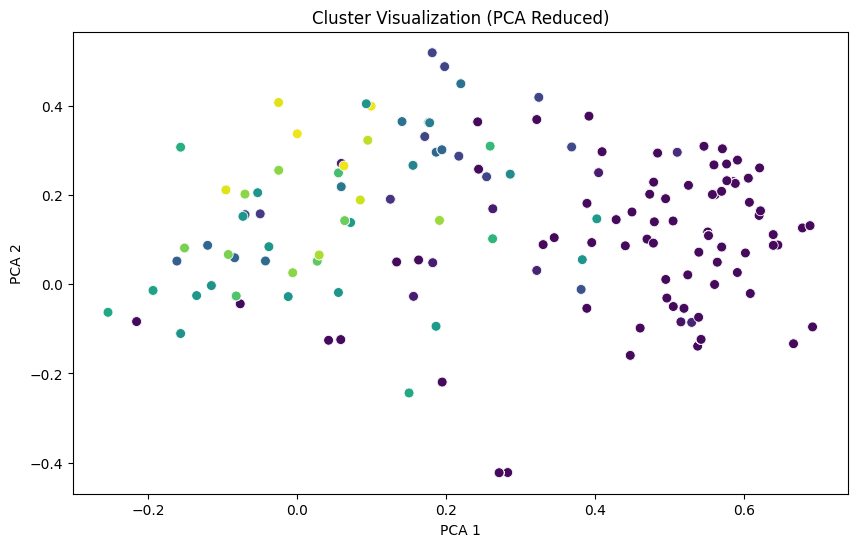

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

print(pca_model.explainedVariance)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_pd, x="x", y="y", hue="Cluster", palette="viridis", s=50).legend().remove()
plt.title("Cluster Visualization (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

It seems that reducing to two dimensions is losing too much information